- [A Beginner's Guide to Machine Learning Algorithms](https://acethecloud.com/blog/machine-learning-algorithms/?src=linked.com)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 14

1. Linear Regression.

Linear regression is a machine learning algorithm that is used for predicting a continuous target variable based on one or more explanatory variables. It is based on the idea of finding a linear relationship between the explanatory variables and the target variable.

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# create some sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

# create a linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

#predict the target variable from a new data point
prediction = model.predict(np.array([[6]]))
print(prediction)

[6.]


2. Logistic Regression

Logistic regression is a type of classification algorithm that is used to predict a binary outcome, such as “yes” or “no,” “0” or “1,” or “true” or “false.” It is based on the logistic function, which maps a continuous input to a value between 0 and 1.

[link](https://realpython.com/logistic-regression-python/)

model classes:  [0 1]
model intercept:  [-0.81734944]
model coef:  [[0.46989103]]
model prediction probability: 
 [[0.05012651 0.94987349]
 [0.58600111 0.41399889]]
model prediction:  [1 0]
Accuracy: 1.0
confution matrix:
 [[1 0]
 [0 1]]


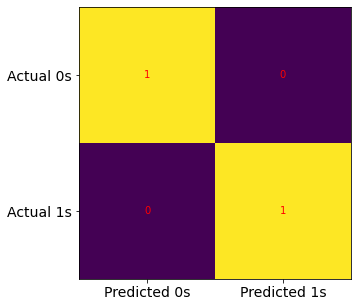

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# create some sample data
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model
model = LogisticRegression(solver="liblinear", C=1.0, random_state=0)

# fit the model to the training data
model.fit(X_train, y_train)

print("model classes: ", model.classes_)
print("model intercept: ", model.intercept_)
print("model coef: ", model.coef_)
print("model prediction probability: \n", model.predict_proba(X_test))

# make predictions on the test data
y_pred = model.predict(X_test)
print("model prediction: ", y_pred)

# evaluate the model performance
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print("confution matrix:\n", cm)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')


In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [5]:
# Example 2: this problem is not linearly separable

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0)
model.fit(x, y)

p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

print("score:", score_)
print("prediction:\n", y_pred)
print("confusion matrix:\n", conf_m)
print("classification report:\n", report)
print("prediction probability:\n", p_pred)



score: 0.8
prediction:
 [0 0 0 1 1 1 1 1 1 1]
confusion matrix:
 [[2 1]
 [1 6]]
classification report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10

prediction probability:
 [[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]


Logistic Regression in Python: Handwriting Recognition

In [6]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [7]:
x, y = load_digits(return_X_y=True)
x.shape, y.shape, set(y)

((1797, 64), (1797,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

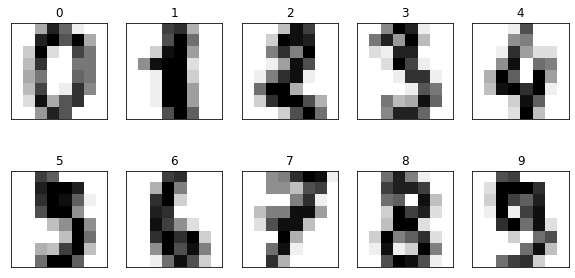

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(x[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[], title=y[i])


In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

model = LogisticRegression(solver="liblinear",
                           C=0.05,
                           multi_class="ovr",
                           random_state=0).fit(x_train, y_train)

# When you’re working with problems with more than two classes, 
# you should specify the multi_class parameter of LogisticRegression. 
# It determines how to solve the problem:
# 'ovr' says to make the binary fit for each class.

# model evaluation
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print("accuracy train: {:.4f}".format(model.score(x_train, y_train)))
print("accuracy test : {:.4f}".format(model.score(x_test, y_test)))


(1437, 64) (360, 64) (1437,) (360,)
accuracy train: 0.9645
accuracy test : 0.9417


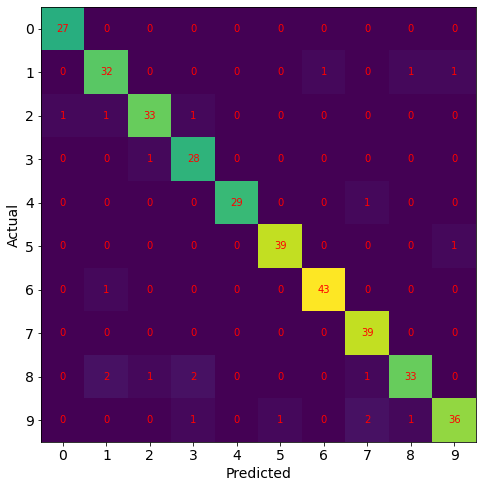

In [10]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



3. Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train a decision tree
tree_clf = DecisionTreeClassifier(max_depth=3,
                                #   min_samples_split=10,
                                  random_state=42)
tree_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = tree_clf.predict(X_test)

# evaluate the model performance
accuracy = tree_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [13]:
print("keys:\n", list(iris.keys()))
print(iris['data'].shape, iris['target'].shape, set(iris['target']))
print(f"feature names: \n {'-'*50}\n", iris['feature_names'])
print(f"target names: \n {'-'*50}\n", iris['target_names'])

keys:
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
(150, 4) (150,) {0, 1, 2}
feature names: 
 --------------------------------------------------
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: 
 --------------------------------------------------
 ['setosa' 'versicolor' 'virginica']


In [14]:
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


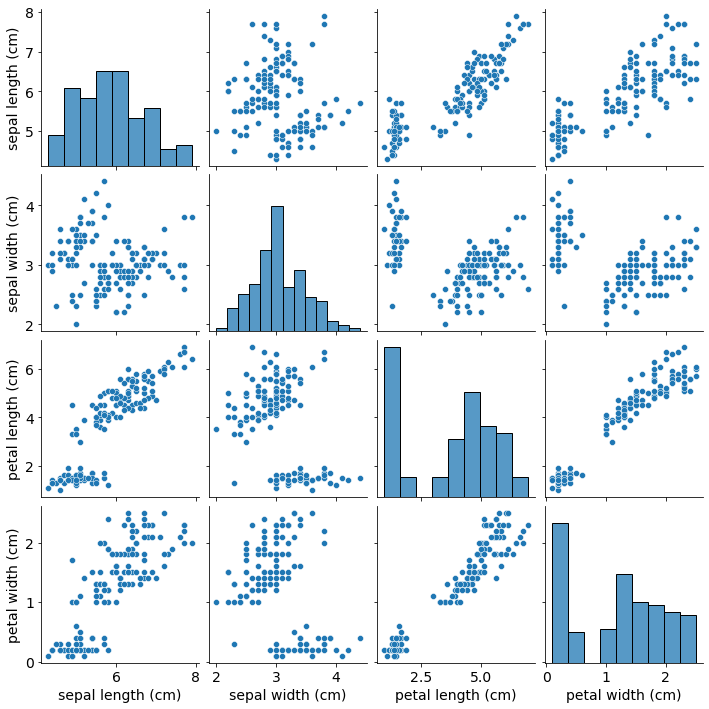

In [15]:
sns.pairplot(df_iris);

4. Support vector machines (SVMs)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



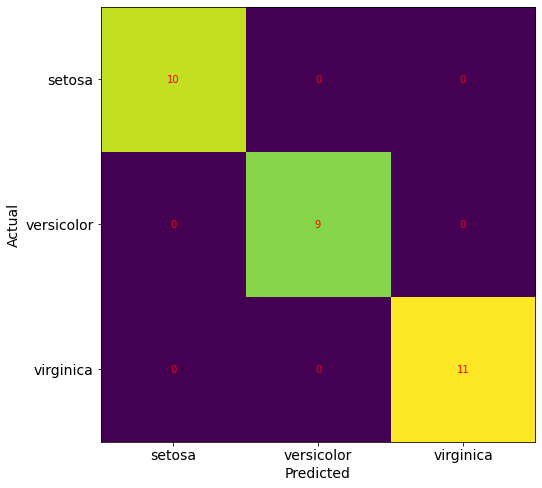

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
clf = SVC(kernel='rbf', random_state=42) # linear
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(3))
ax.yaxis.set(ticks=range(3))

ax.set_xticklabels(iris['target_names'])
ax.set_yticklabels(iris['target_names'])

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')



#### Hands On with Unsupervised learning category of Algorithms

1. K-means clustering

Text(0, 0.5, 'WCSS')

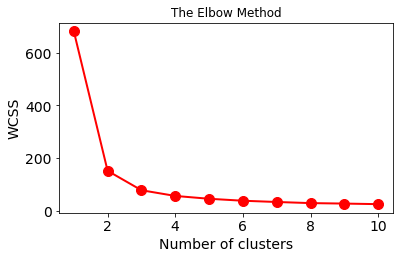

In [17]:
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data
y = iris.target

# finding the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 3.5))
plt.plot(range(1, 11), wcss, marker='o', lw=2, ms=10, color="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

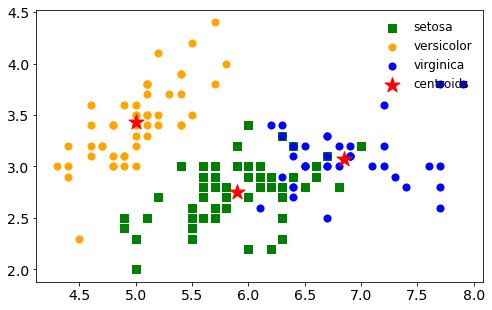

In [19]:
# visualize the clusters
# plot first two features and color by cluster
plt.figure(figsize=(8, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='green', marker='s', label=iris['target_names'][0])
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='orange', marker='o', label=iris['target_names'][1])
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='blue', marker='o', label=iris['target_names'][2])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend(loc='upper right', frameon=False)

2. Hierarchical clustering

[Link](https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)

[Machine Learning A-Z: Download Codes and Datasets](https://drive.google.com/drive/folders/1OFNnrHRZPZ3unWdErjLHod8Ibv2FfG1d)

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dataset = pd.read_csv('data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
print(X.shape)
dataset.head(10)

(200, 2)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Text(0, 0.5, 'Euclidean distances')

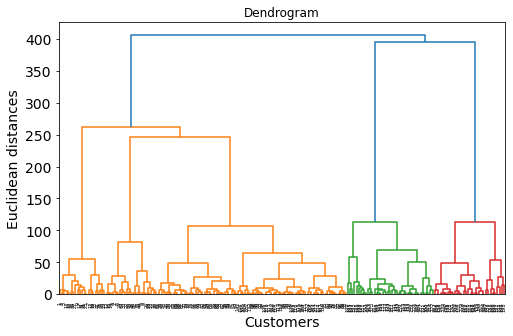

In [21]:
# using dedrogram to find the optimal number of clusters
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')


Training the hierarchical clustering model on the dataset

In [22]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

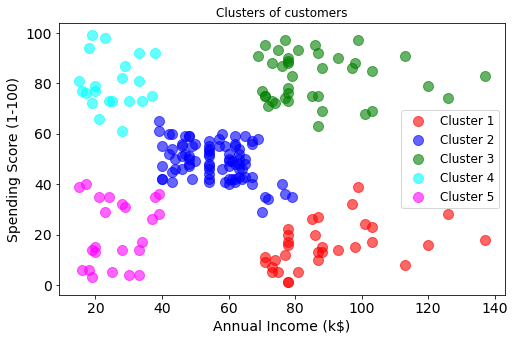

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red',     alpha=0.6, label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue',    alpha=0.6, label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green',   alpha=0.6, label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan',    alpha=0.6, label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', alpha=0.6, label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

3. Principal component analysis (PCA)

[link](https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19#:~:text=The%20Iris%20dataset%20is%20one,and%20sepal%20length%20and%20width.)

In [30]:
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris['feature_names'])
df_iris['type'] = iris.target
print(iris.feature_names)
print(iris.target_names)

df_iris.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
type_dict = {
    0:iris.target_names[0], 
    1:iris.target_names[1], 
    2:iris.target_names[2]
    }
df_iris['name'] = df_iris['type'].map(type_dict)
print(type_dict)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


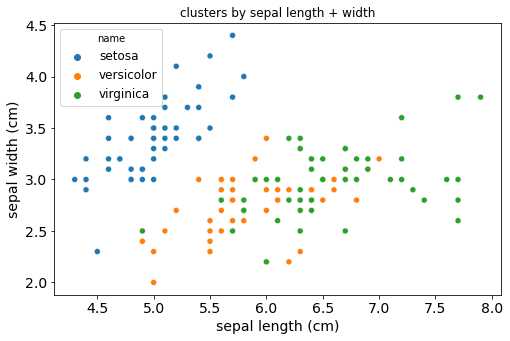

In [32]:
sns.scatterplot(x=df_iris['sepal length (cm)'], 
                y=df_iris['sepal width (cm)'], 
                hue=df_iris['name'])
plt.title('clusters by sepal length + width');

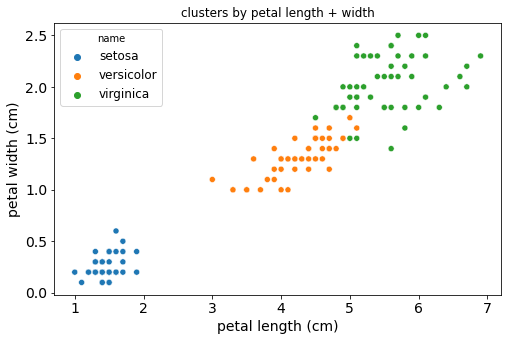

In [33]:
sns.scatterplot(x=df_iris['petal length (cm)'], 
                y=df_iris['petal width (cm)'], 
                hue=df_iris['name'])
plt.title('clusters by petal length + width');

In [42]:
from sklearn.preprocessing import StandardScaler
# drop name and type columns
x = df_iris.drop(['name', 'type'], axis=1).values

print(df_iris.head(2))
x_scale = StandardScaler().fit_transform(x)
pd.DataFrame(x_scale, columns=iris.feature_names).head(2)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   type    name  
0     0  setosa  
1     0  setosa  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444


In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale)
pca2_df = pd.DataFrame(data = principalComponents,
                            columns = ['pca1', 'pca2'])
                            

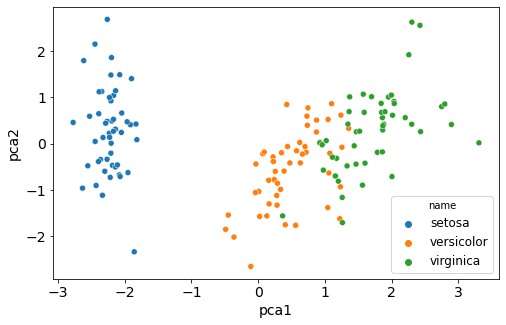

In [53]:
sns.scatterplot(x=pca2_df['pca1'],
                y=pca2_df['pca2'],
                hue=df_iris['name']);


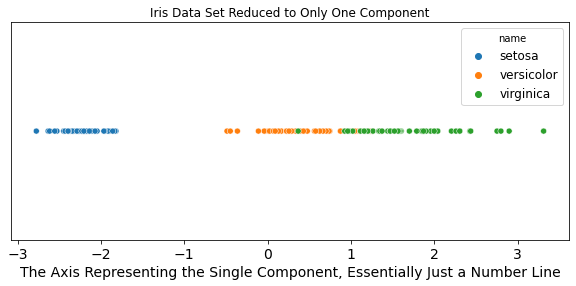

In [54]:
pca_solo = PCA(n_components=1)
solopca_vals = pca_solo.fit_transform(x_scale)
zeros = np.zeros(len(solopca_vals))
solo_components = [i[0] for i in solopca_vals]


plt.figure(figsize = (10,4))
sns.scatterplot(x=solo_components, y=zeros, hue=df_iris['name'])
plt.title('Iris Data Set Reduced to Only One Component')
plt.yticks([])
plt.xlabel('The Axis Representing the Single Component, Essentially Just a Number Line')
plt.show()

In [56]:
df_solo = pd.DataFrame(data=solo_components, columns=['pca1'])
df_solo['name'] = df_iris['name']
pca2_df['name'] = df_iris['name']
df_solo.head()

,pca1,name
0,-2.264703,setosa
1,-2.080961,setosa
2,-2.364229,setosa
3,-2.299384,setosa
4,-2.389842,setosa


In [57]:
pca2_df.head()

,pca1,pca2,name
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_iris.drop(['name', 'type'], axis=1), df_iris['type'], test_size=0.2, random_state=0)
pca1_x_train, pca1_x_test, pca1_y_train, pca1_y_test = train_test_split(df_solo.drop(['name'], axis=1), df_iris['type'], test_size=0.2, random_state=0)
pca2_x_train, pca2_x_test, pca2_y_train, pca2_y_test = train_test_split(pca2_df.drop(['name'], axis=1), df_iris['type'], test_size=0.2, random_state=0)

In [75]:
from sklearn.metrics import accuracy_score

model = LinearRegression().fit(x_train, y_train)
pca1_model = LinearRegression().fit(pca1_x_train, pca1_y_train)
pca2_model = LinearRegression().fit(pca2_x_train, pca2_y_train)

pred = [round(i) for i in model.predict(x_test)]
pca1_pred = [round(i) for i in pca1_model.predict(pca1_x_test)]
pca2_pred = [round(i) for i in pca2_model.predict(pca2_x_test)]

print('Accuracy of Linear Regression on original data: ', accuracy_score(y_test, pred))
print('Accuracy of Linear Regression on PCA1 data: ', accuracy_score(pca1_y_test, pca1_pred))
print('Accuracy of Linear Regression on PCA2 data: ', accuracy_score(pca2_y_test, pca2_pred))

Accuracy of Linear Regression on original data:  1.0
Accuracy of Linear Regression on PCA1 data:  0.9
Accuracy of Linear Regression on PCA2 data:  0.9
